# Problem Statement

To build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df= pd.read_csv(r'C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Micro Credit Project\Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Data Description 

1.  Unnamed: 0
2.  label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success,                  0:failure}
3.  msisdn : mobile number of user
4.  aon : age on cellular network in days
5.  daily_decr30 : daily amount spent from main account, averaged over last 30 days(in Indonesian Rupiah)
6.  daily_decr90 : daily amount spent from main account, averaged over last 90 days(in Indonesian Rupiah)
7.  rental30 : average main account balance over last 30 days
8.  rental90 : average main account balance over last 90 days
9.  last_rech_date_ma : number of days till last recharge of main account
10. last_rech_date_da : number of days till last recharge of data account
11. last_rech_amt_ma : amount of last recharge of main account(in Indonesian Rupiah)
12. cnt_ma_rech30 : Number of times main account got recharged in last 30 days
13. fr_ma_rech30 : frequency of main account recharged in last 30 days
14. sumamnt_ma_rech30 : total amount of recharge in main account over last 30 days(in Indonesian Rupiah)
15. medianamnt_ma_rech30 : median of amount of recharges done in main account over last 30 days at user level (in                                      Indonesian Rupiah)
16. medianmarechprebal30 : median of main account balance just before recharge in last 30 days at user level (in 
                           Indonesian Rupiah)
17. cnt_ma_rech90 : Number of times main account got recharged in last 90 days
18. fr_ma_rech90 : frequency of main account recharged in last 90 days
19. sumamnt_ma_rech90 : total amount of recharge in main account over last 90 days(in Indonesian Rupiah)
20. medianamnt_ma_rech90 : median of amount of recharges done in main account over last 90 days at user level (in 
                           Indonesian Rupiah)
21. medianmarechprebal90 : median of main account balance just before recharge in last 90 days at user level (in
                           Indonesian Rupiah)
22. cnt_da_rech30 : Number of times data account got recharged in last 30 days
23. fr_da_rech30 : frequency of data account recharged in last 30 days
24. cnt_da_rech90 : Number of times data account got recharged in last 90 days
25. fr_da_rech90 : frequency of data account recharged in last 90 days
26. cnt_loans30 : number of loans taken by user in last 30 days
27. amnt_loans30 : total amount of loans taken by user in last 30 days
28. maxamnt_loans30 : maximum amount of loan taken by user in last 30 days
29. medianamnt_loans30 : median of amounts of loan taken by user in last 30 days
30. cnt_loans90 : number of loans taken by user in last 90 days
31. amnt_loans90 : total amount of loans taken by user in last 90 days
32. maxamnt_loans90 : maximum amount of loan taken by user in last 90 days
33. medianamnt_loans90 : median of amounts of loan taken by user in last 90 days
34. payback30 : average payback time in days over last 30 days
35. payback90 : average payback time in days over last 90 days
36. pcircle : telecom circle
37. pdate : date

# Checking for Size of Dataset

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows : 209593
No. of Columns : 37


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Checking for data types

In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

The feature 'Unnamed: 0' is of no use. so we will drop it

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

The dataset contains one feature which is showing date. Let's extract day, month and year using pd.to_datetime.

In [6]:
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


Lets drop the original date feature

In [7]:
df.drop(['pdate'],axis=1,inplace=True)

Lets check for value counts of year

In [8]:
df['Year'].value_counts()

2016    209593
Name: Year, dtype: int64

Since the data is only for year 2016 there is no use of column year. Hence we will drop this column.

In [9]:
df.drop(['Year'],axis=1,inplace=True)

# Let's check for duplicate entries

In [10]:
df.duplicated().sum()

1

there is one duplicate entry found

In [11]:
df.duplicated('msisdn').sum()

23350

lets drop duplicate entries

In [12]:
df.drop_duplicates(keep='last',inplace=True)

Check for shape of dataset after removing duplicate entries

In [13]:
df.shape

(209592, 37)

# Data Integrity Check

In [14]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

There are no ['NA','N/A','-','?',',',' ',' ?'] present in our dataset

# Null Values

In [15]:
df.isnull().sum().sum()

0

It means there are no missing values in our dataset.

# Check for Descriptive Statistics of Dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209592.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.0000,1.000000
aon,209592.0,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.0000,999860.755168
daily_decr30,209592.0,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.0960,265926.000000
daily_decr90,209592.0,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.7950,320630.000000
rental30,209592.0,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.9450,198926.110000
rental90,209592.0,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.7925,200148.110000
last_rech_date_ma,209592.0,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.0000,998650.377733
last_rech_date_da,209592.0,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.0000,999171.809410
last_rech_amt_ma,209592.0,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,209592.0,3.978053,4.256099,0.000000,1.000000,3.000000,5.0000,203.000000


In [17]:
df.describe(include=object)

,msisdn,pcircle
count,209592,209592
unique,186243,1
top,04581I85330,UPW
freq,7,209592


# Observations

1. Mean value is greater than median for every feature which means that the skewness is present in every feature.
2. pcircle contain single unique value UPW, so we can drop this feature.
3. For some features there is a high difference in 75% value and maximum value which shows that there are outliers present.
4. Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.
5. For some features minimum values are negatives.

# Handling features with Negative Values

In [18]:
df['aon'].describe()

count    209592.000000
mean       8112.380399
std       75696.261220
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [19]:
df[df['aon']<0].value_counts().sum()

1539

In [20]:
df[df['aon'] > 3650].value_counts().sum()

2089

Similarly, the features ['daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da'] contains negative values.
Here to handle these problem we will make assumption that all the negative values are the typing errors.
We will correct them by using absolute function. 
Also we will handle the upper limits by removing outliers.

In [21]:
#Let's convert the negative values into positive ones
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [22]:
# Let's chck for the feature 'maxamnt_loans30'
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

In [23]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [24]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [25]:
df.to_csv('Clean_data_file.csv',sep=',',index=False)

In [26]:
df=pd.read_csv('Clean_data_file.csv')

In [27]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows : 209592
No. of Columns : 37


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6


# EDA

# 1. label

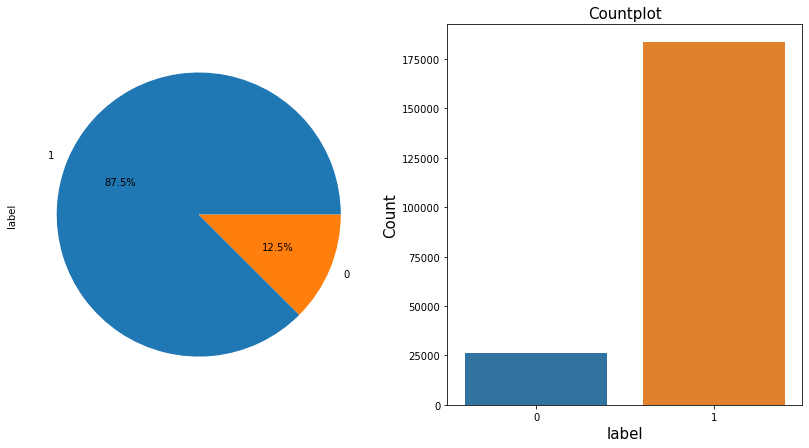

1    183430
0     26162
Name: label, dtype: int64

In [28]:
f,ax=plt.subplots(1,2,figsize=(14,7))
df['label'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
sns.countplot('label',data = df,ax=ax[1])
plt.xlabel('label', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['label'].value_counts()

# Observations

87.5% users paid back the credit amount within 5 days of issuing the loan
12.5% users failed to payback the credit amount within 5 days of issuing the loan.

# 2. Month

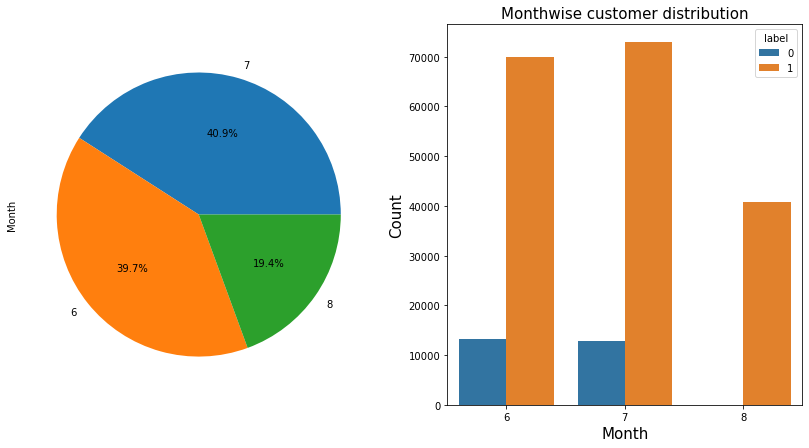

7    85764
6    83154
8    40674
Name: Month, dtype: int64

In [29]:
f,ax=plt.subplots(1,2,figsize=(14,7))
df['Month'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('Month',hue = 'label',data = df,ax=ax[1])
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthwise customer distribution',fontsize=15)

plt.show()
df['Month'].value_counts()

# 3. Day

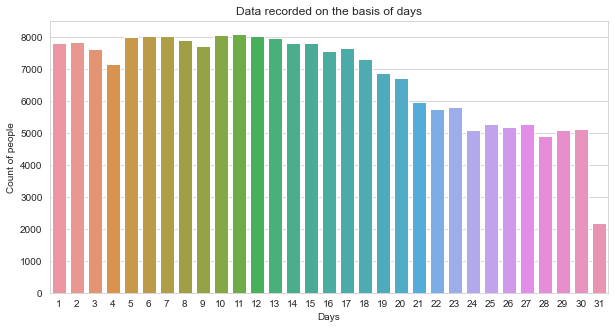

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

# 4. maxamnt_loans30

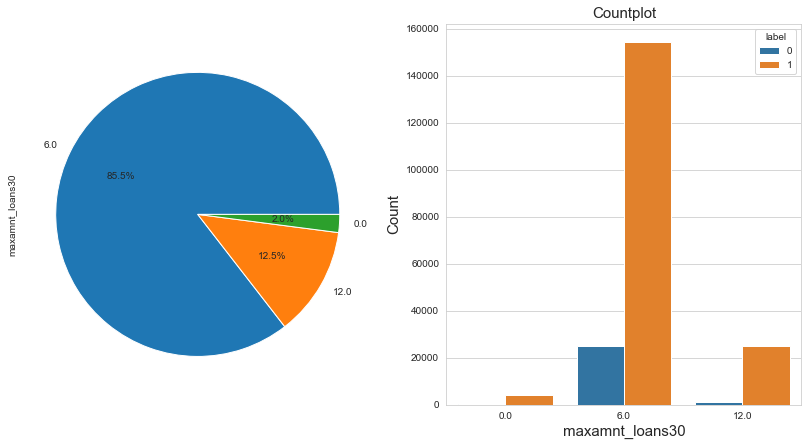

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['maxamnt_loans30'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('maxamnt_loans30',hue = 'label',data = df,ax=ax[1])
plt.xlabel('maxamnt_loans30', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['maxamnt_loans30'].value_counts()

# Observations

for last 30 days : 
    For more than 85% of users the maximum loan amount is 6 
    For 12.5% users the maximum loan amount is 12
    For 2% users didn't took loan

# 5.maxamnt_loans90

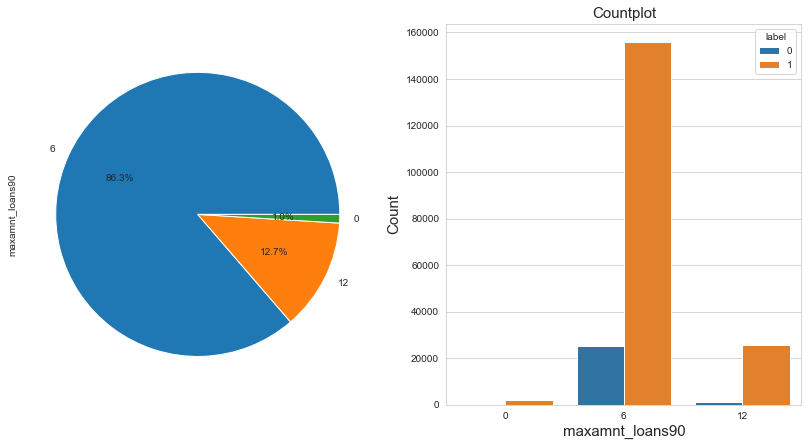

6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,7))

df['maxamnt_loans90'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])

sns.countplot('maxamnt_loans90',hue = 'label',data = df,ax=ax[1])
plt.xlabel('maxamnt_loans90', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['maxamnt_loans90'].value_counts()

# Observations 

for last 90 days:
    for 86.3% user the maximum loan amount is 6
    for 12.7% user the maximum loan amount is 12
    1% of user didn't took loan for last 90 days

# 6. cnt_loans30

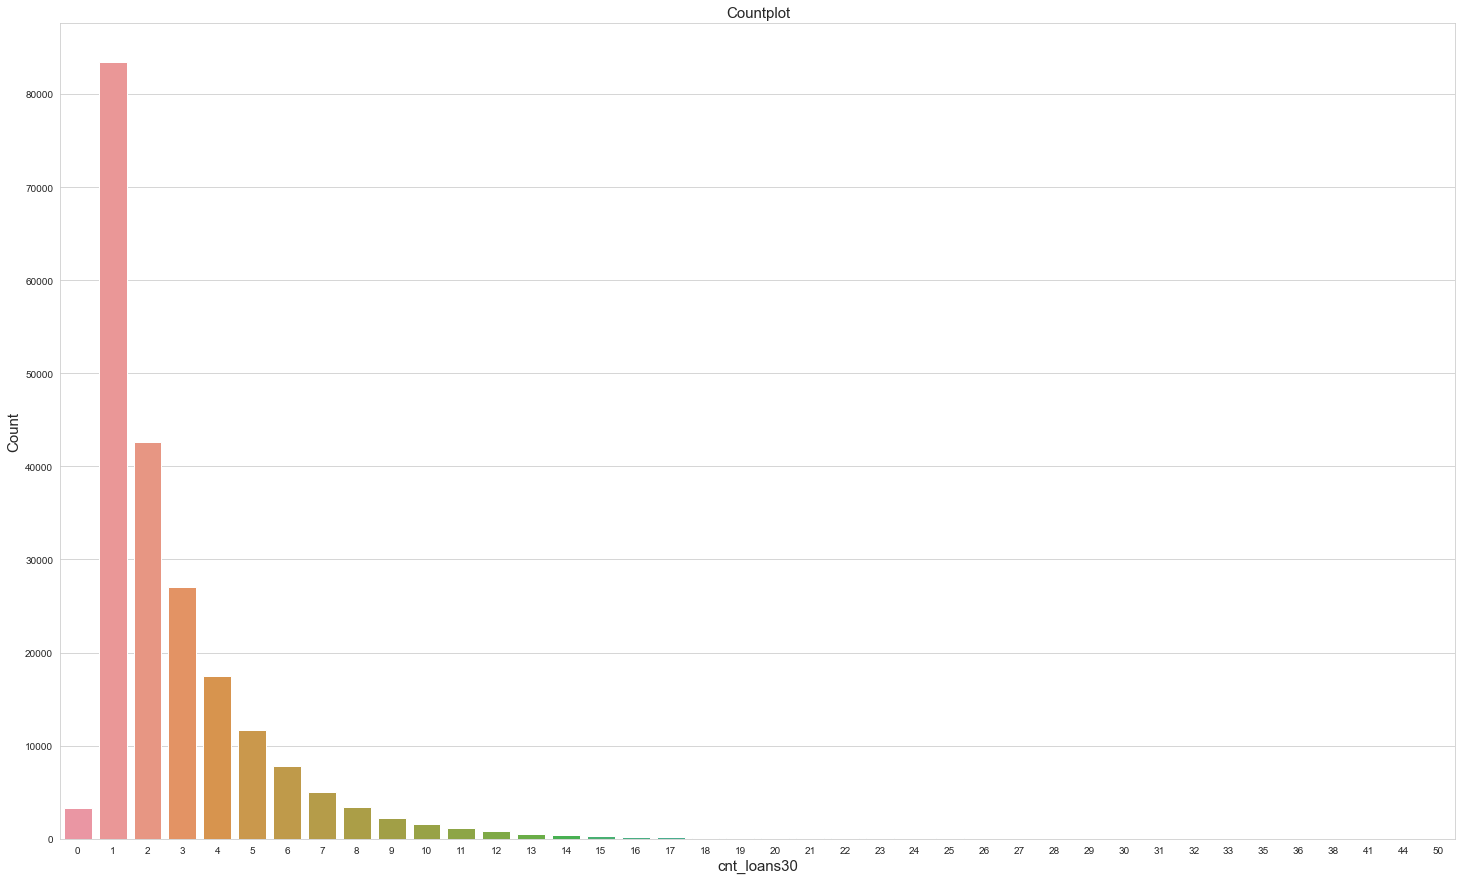

1     83432
2     42665
3     27050
4     17498
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
36        1
41        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64

In [33]:
plt.subplots(figsize=(25,15))
sns.countplot('cnt_loans30',data = df)
plt.xlabel('cnt_loans30', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['cnt_loans30'].value_counts()

# 7. cnt_loans30 vs amnt_loans30

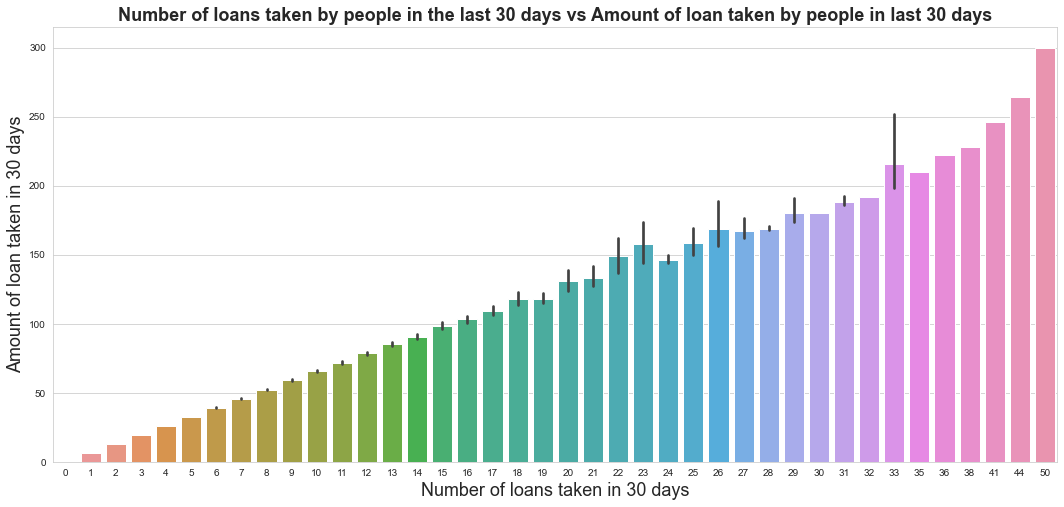

In [34]:
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18)
plt.ylabel('Amount of loan taken in 30 days',fontsize=18)
plt.show()

# 8. maxamnt_loans90

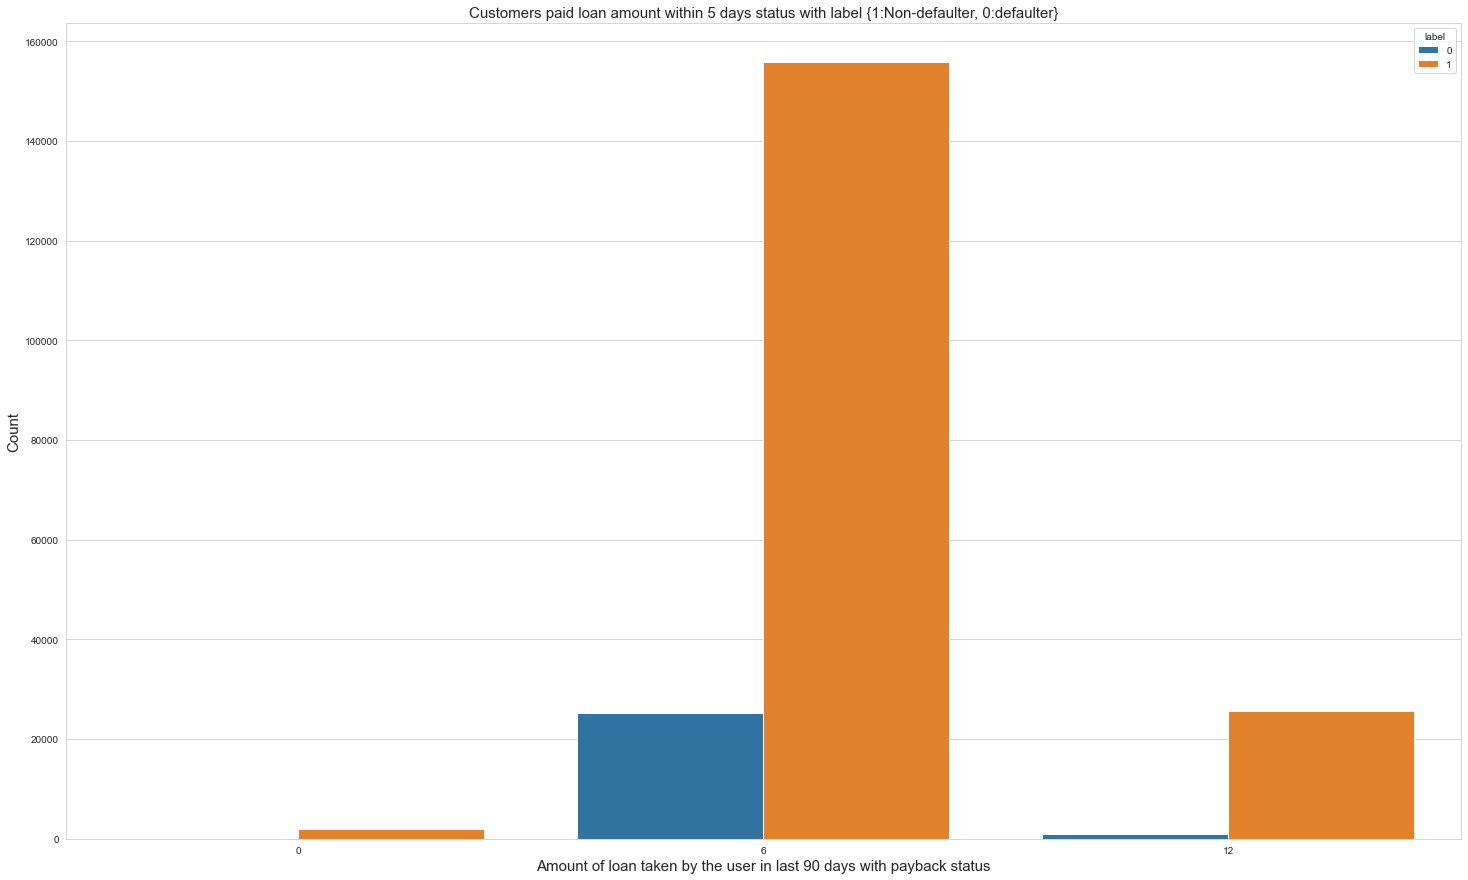

6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [35]:
plt.subplots(figsize=(25,15))
sns.countplot(x= 'maxamnt_loans90',data = df, hue = 'label')
plt.xlabel('Amount of loan taken by the user in last 90 days with payback status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter}',fontsize=15)

plt.show()
df['maxamnt_loans90'].value_counts()

# 9. maxamnt_loans30

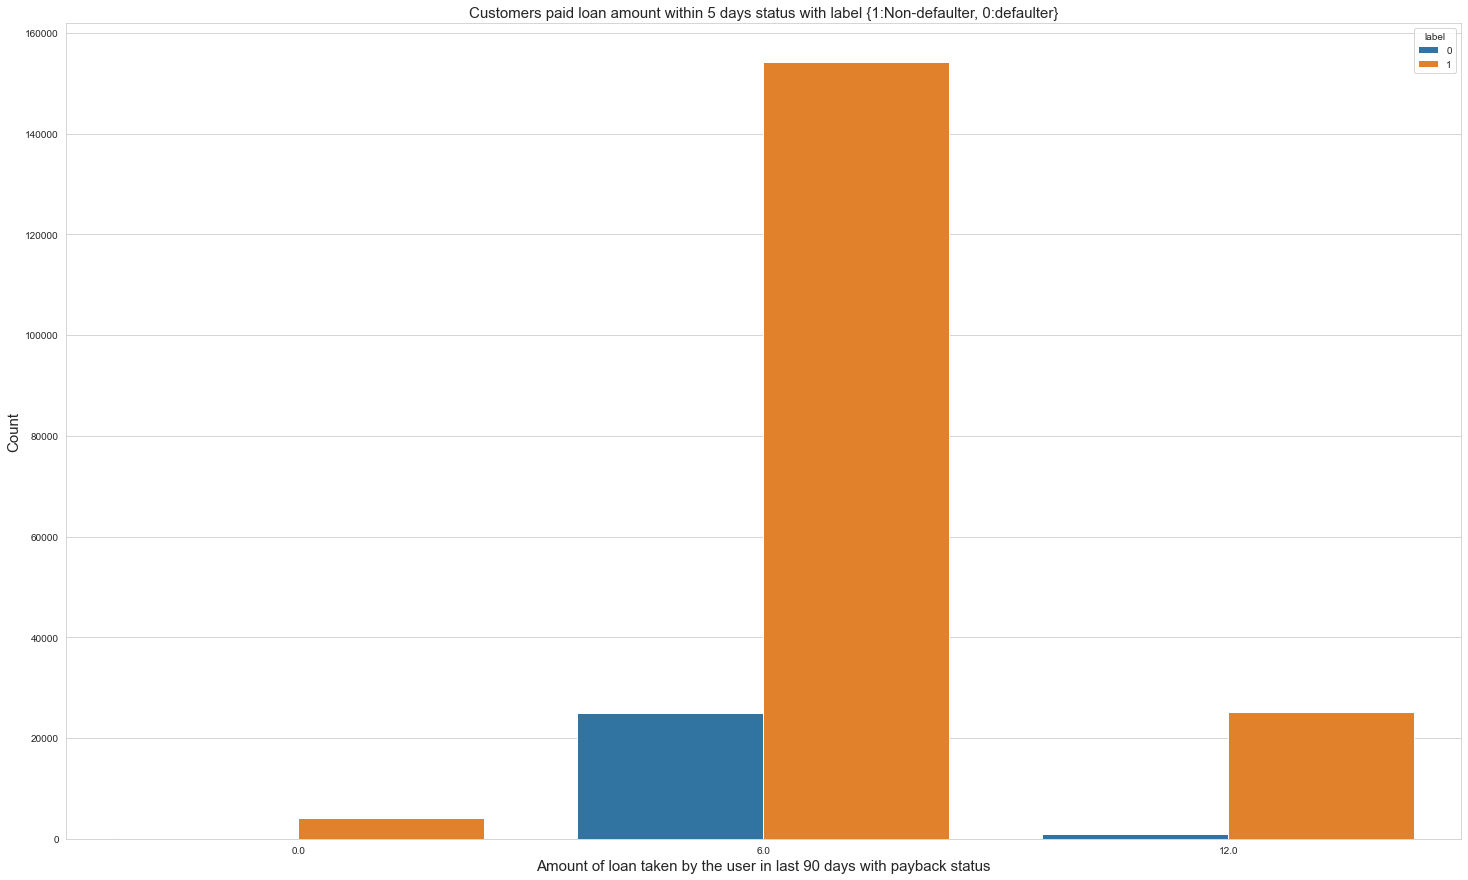

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [36]:
plt.subplots(figsize=(25,15))
sns.countplot(x= 'maxamnt_loans30',data = df, hue = 'label')
plt.xlabel('Amount of loan taken by the user in last 90 days with payback status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter}',fontsize=15)

plt.show()
df['maxamnt_loans30'].value_counts()

# 10. cnt_loans30 vs payback30

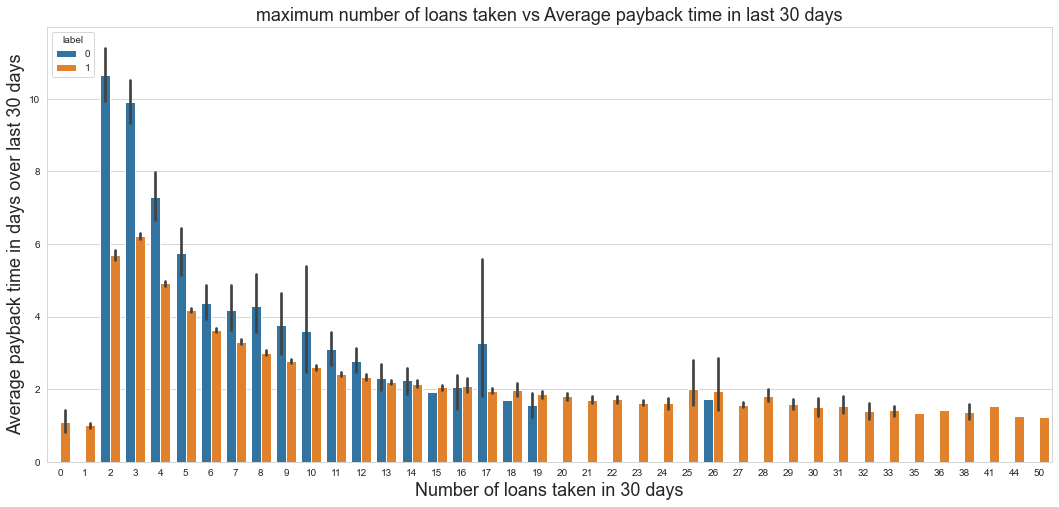

In [37]:
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18)
plt.xlabel('Number of loans taken in 30 days',fontsize=18)
plt.ylabel('Average payback time in days over last 30 days',fontsize=18)
plt.show()

# 11.daily_decr30 vs Day

<Figure size 1080x576 with 0 Axes>

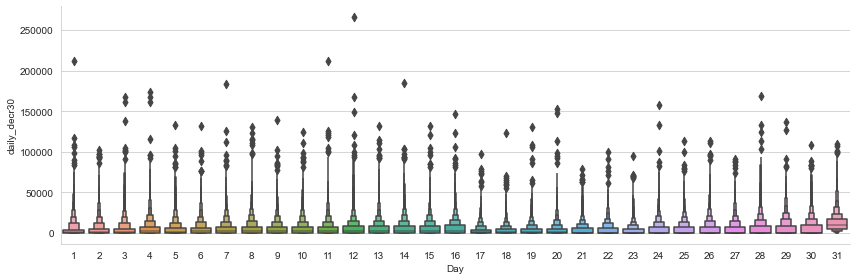

In [38]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

# 12. daily_decr90 vs Day

<Figure size 1080x576 with 0 Axes>

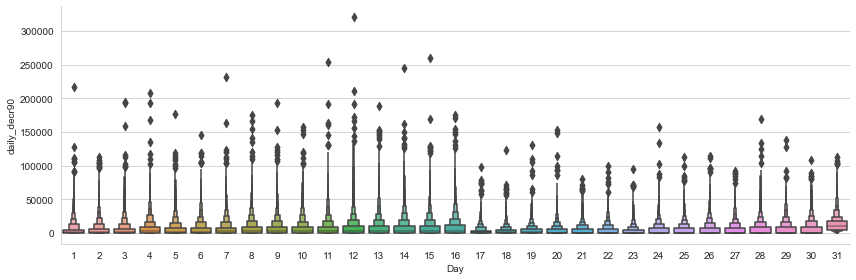

In [39]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr90", x = "Day", data = df.sort_values("daily_decr90", ascending = False),
            kind="boxen", height = 4, aspect =3)
plt.show()

In [40]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle']}

Since 'msisdn' and 'pcircle' are irrelevent features, we will drop them

In [41]:
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

# Outliers detection

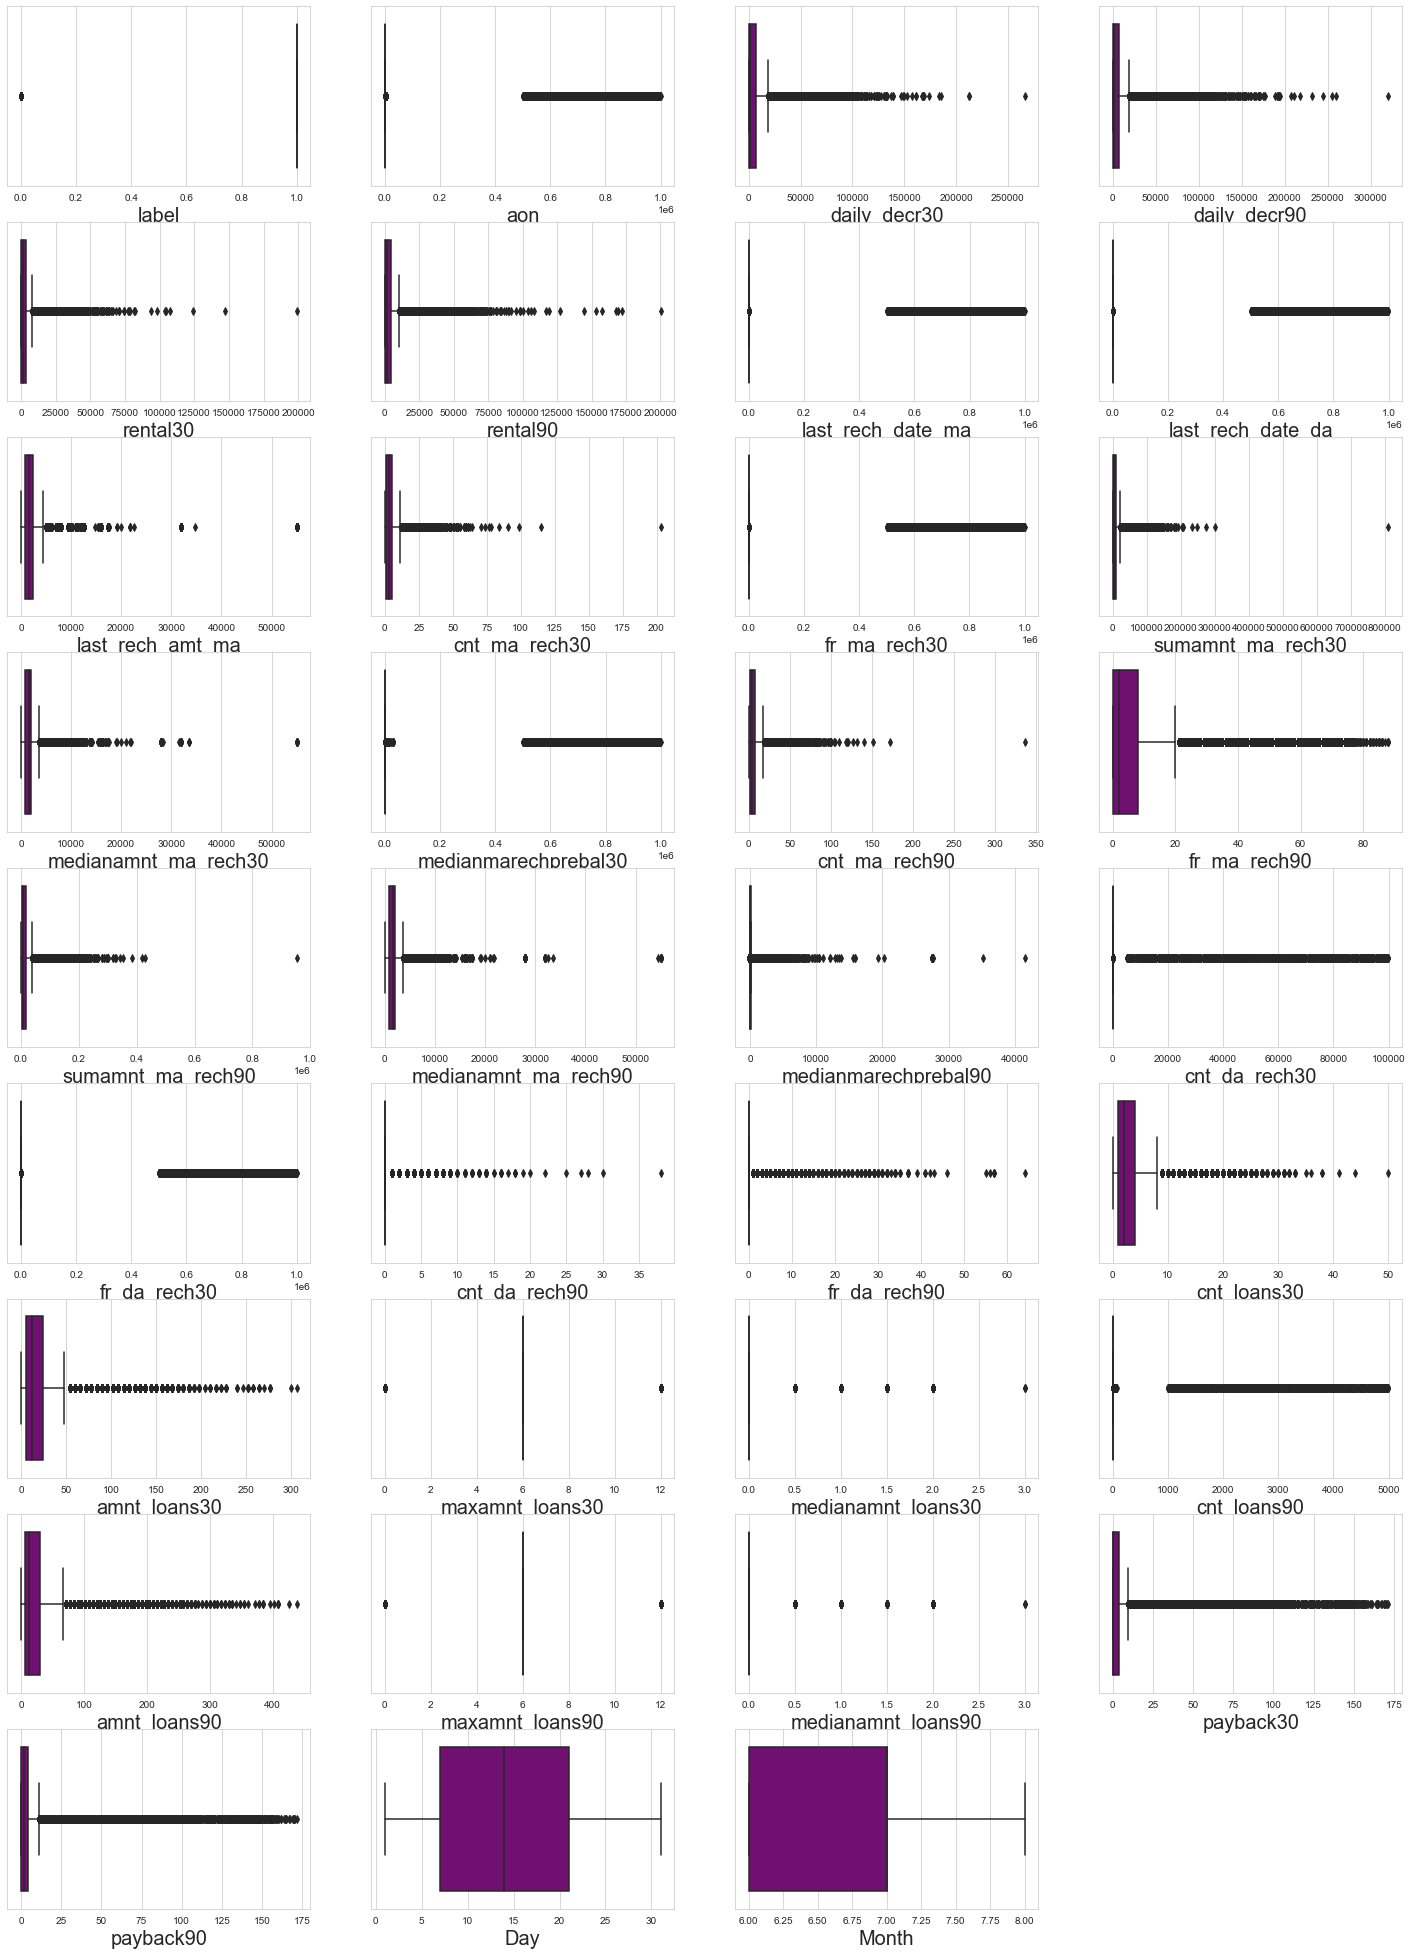

In [42]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='purple')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

# Outliers Removal

From the above boxplot we can see that most of the features contains outliers and one more thing to note is that the outliers are present in upper bound. 
Here we will perform Quantile-based Flooring and Capping technique to remove outliers.
In this case, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.

In [43]:
Q1 = df.quantile(0)
Q3= df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

label                       1.000000
aon                      2419.090000
daily_decr30            41730.620000
daily_decr90            49967.457800
rental30                19466.008500
rental90                26997.976500
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.620000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.545000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.270000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.199700
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [44]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new.shape)

(198174, 35)


In [45]:
print("Percentage Data Loss : ", ((209592-198174)/209592)*100, "%")

Percentage Data Loss :  5.447727012481392 %


We lost 5.44% data while removing the outliers which is not a high percentage and we can affoard this.

# Skewness

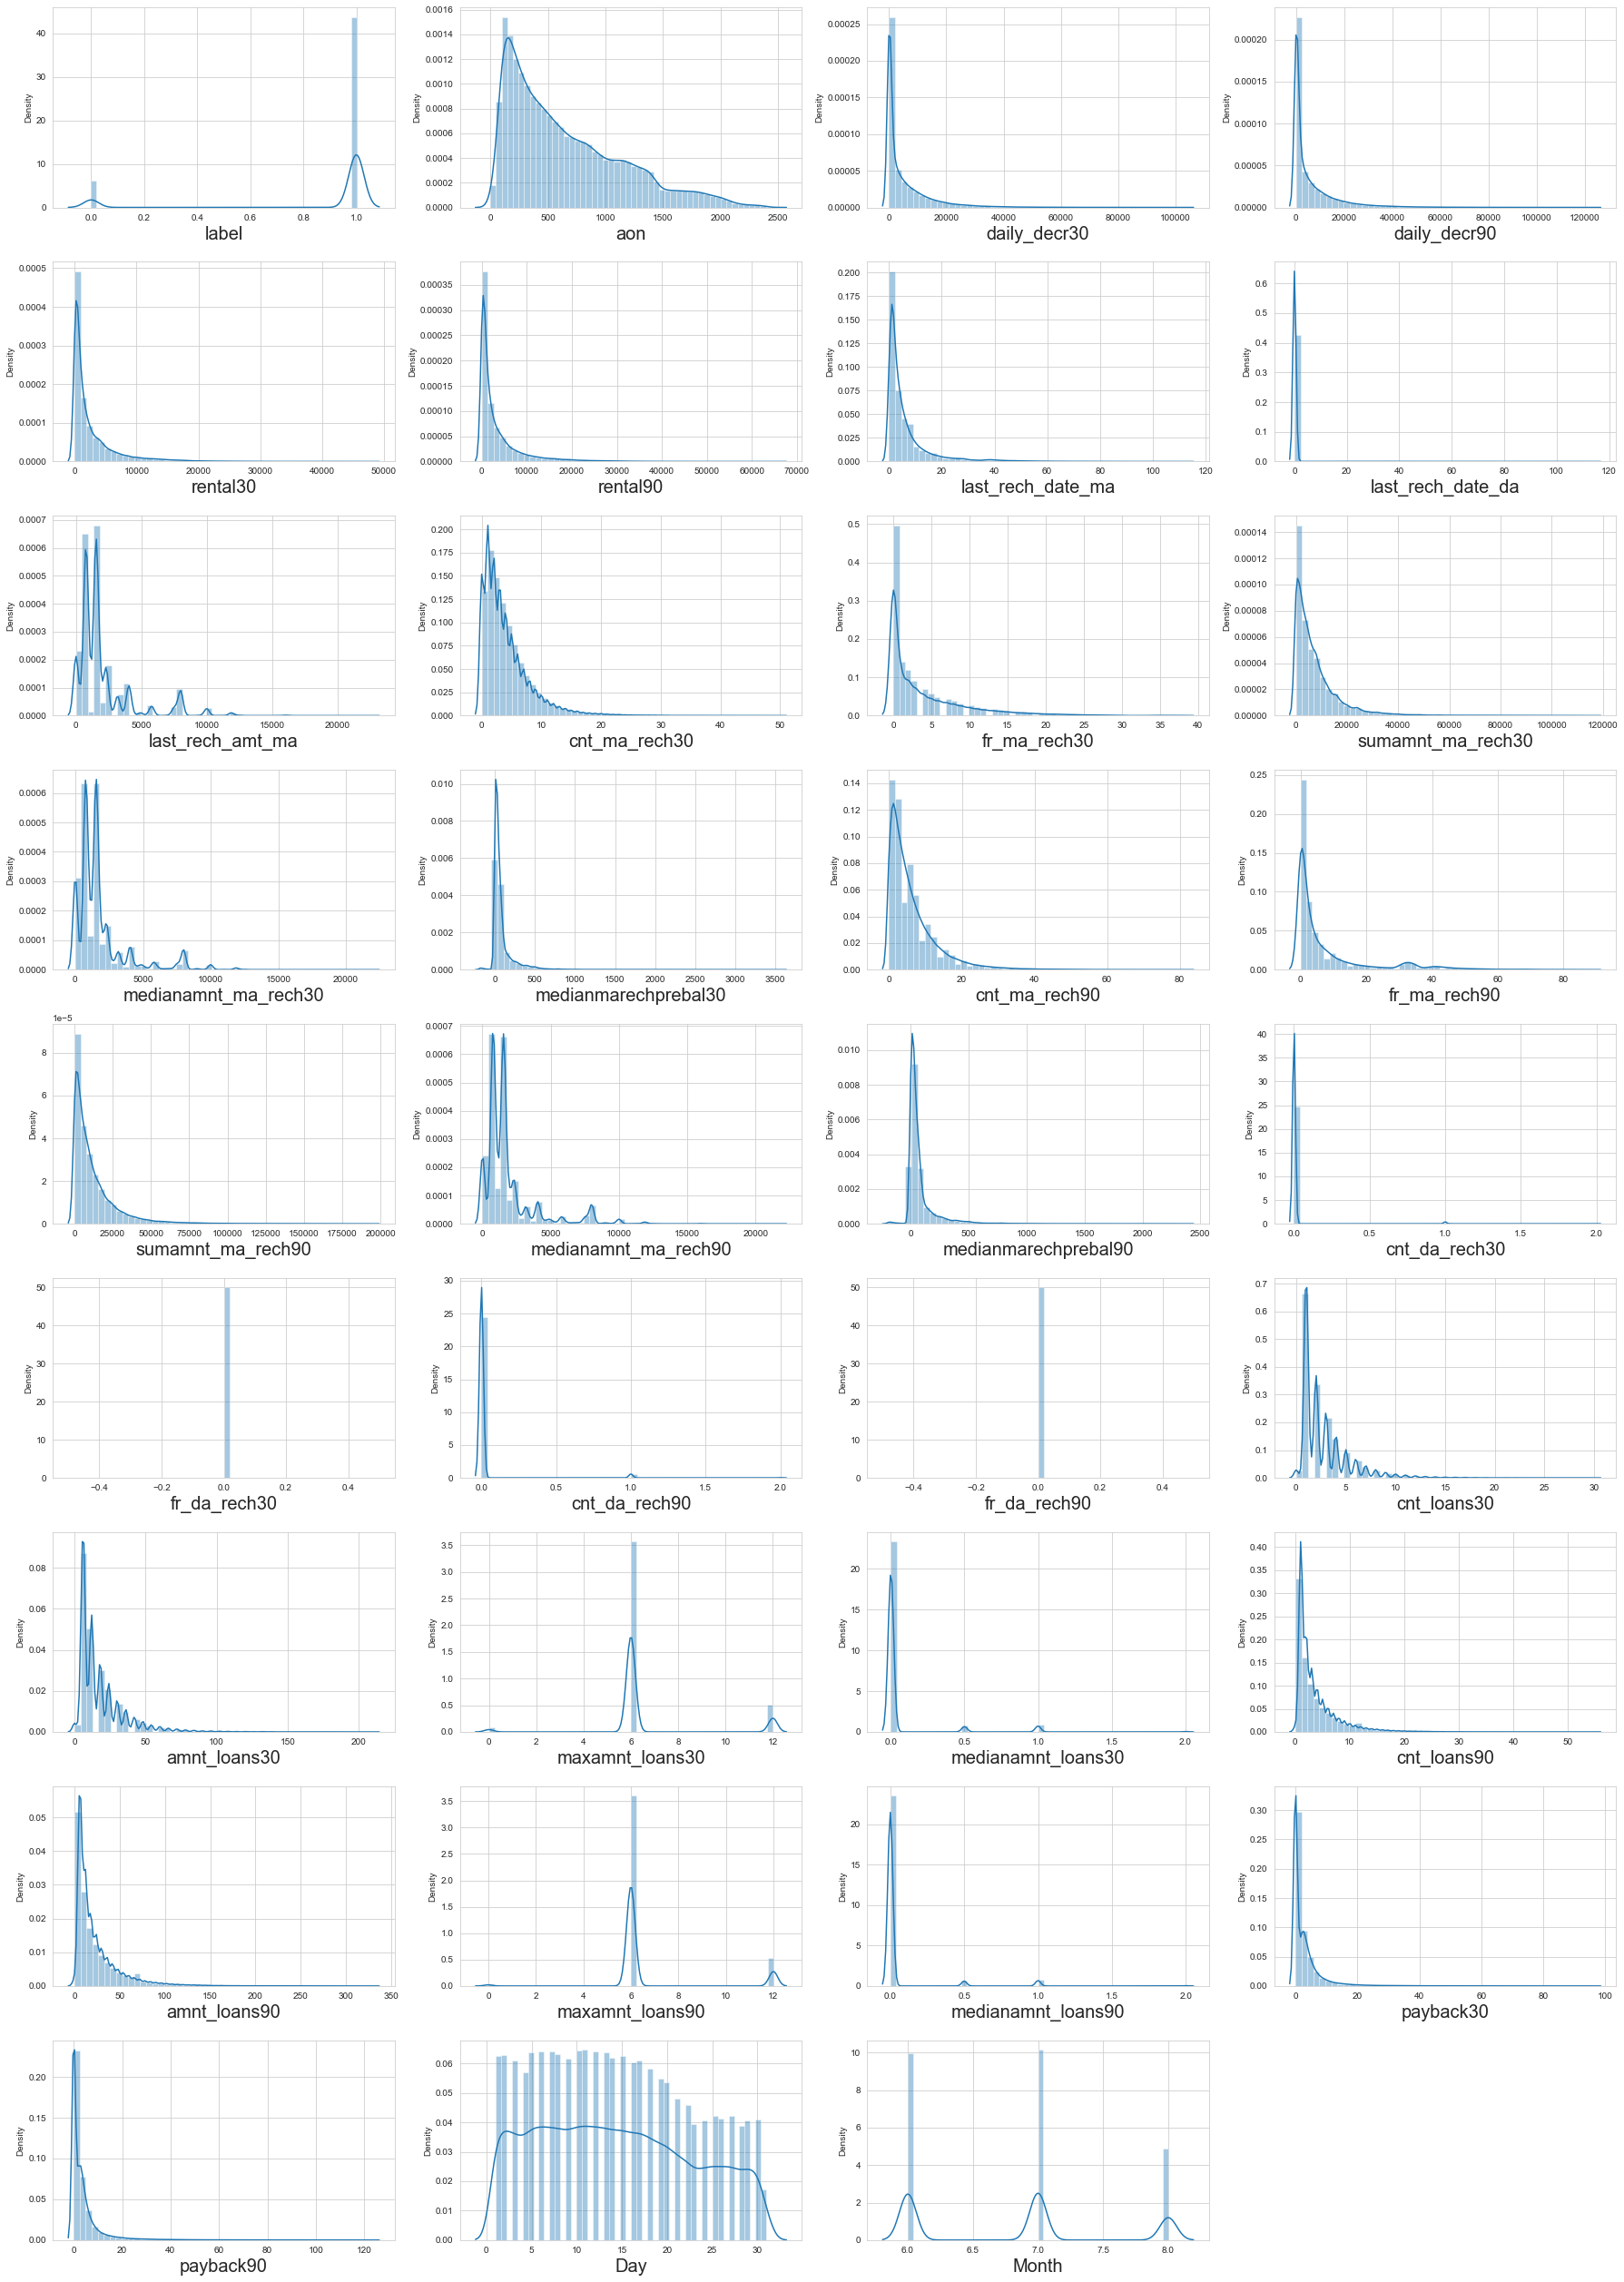

In [46]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df_new:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

In [47]:
df_new.skew()

label                   -2.271908
aon                      0.953359
daily_decr30             3.105440
daily_decr90             3.271934
rental30                 3.099030
rental90                 3.254858
last_rech_date_ma        3.474759
last_rech_date_da       10.002349
last_rech_amt_ma         2.299548
cnt_ma_rech30            2.353904
fr_ma_rech30             2.022702
sumamnt_ma_rech30        3.126539
medianamnt_ma_rech30     2.511191
medianmarechprebal30     6.367321
cnt_ma_rech90            2.583006
fr_ma_rech90             2.282754
sumamnt_ma_rech90        3.170519
medianamnt_ma_rech90     2.528494
medianmarechprebal90     5.600052
cnt_da_rech30           10.650435
fr_da_rech30             0.000000
cnt_da_rech90            7.349590
fr_da_rech90             0.000000
cnt_loans30              2.502413
amnt_loans30             2.643728
maxamnt_loans30          1.248748
medianamnt_loans30       4.534407
cnt_loans90              2.797465
amnt_loans90             2.876427
maxamnt_loans9

In [48]:
df_new.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

In [49]:
df_new.head(10)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,2,7
6,1,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,5,7
7,1,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,5,8
8,1,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,15,6
9,1,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,6


In [50]:
df_new[['cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90']].value_counts().index

MultiIndex([(0.0, 0.0, 0, 0),
            (0.0, 0.0, 1, 0),
            (1.0, 0.0, 1, 0),
            (2.0, 0.0, 2, 0),
            (0.0, 0.0, 2, 0),
            (1.0, 0.0, 2, 0)],
           names=['cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90'])

In [51]:
df_new['fr_da_rech30'].value_counts()

0.0    198174
Name: fr_da_rech30, dtype: int64

In [52]:
df_new['fr_da_rech90'].value_counts()

0    198174
Name: fr_da_rech90, dtype: int64

The above two value_counts shows that the features 'fr_da_rech30' and 'fr_da_rech90' contains only one value '0' and '0.0'
which are of no use. 
We will drop these two features

In [53]:
df_new.drop(['fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

In [54]:
# skewed features are 
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30',
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

To remove skewness from the above features we will use the Power Transform method

In [55]:
from sklearn.preprocessing import PowerTransformer

In [56]:
pt = PowerTransformer(method='yeo-johnson')

In [57]:
df_new[skew_fea] = pt.fit_transform(df_new[skew_fea].values)

In [58]:
df_new.skew()

label                  -2.271908
aon                    -0.056858
daily_decr30           -0.130882
daily_decr90           -0.120816
rental30               -0.044562
rental90               -0.044552
last_rech_date_ma       0.041791
last_rech_date_da       6.421015
last_rech_amt_ma       -0.083886
cnt_ma_rech30          -0.001233
fr_ma_rech30            0.136359
sumamnt_ma_rech30      -0.314228
medianamnt_ma_rech30   -0.206002
medianmarechprebal30    1.286913
cnt_ma_rech90          -0.003740
fr_ma_rech90            0.143563
sumamnt_ma_rech90      -0.214062
medianamnt_ma_rech90   -0.066142
medianmarechprebal90    1.464515
cnt_da_rech30           9.681389
cnt_da_rech90           6.688823
cnt_loans30             0.036997
amnt_loans30            0.002737
maxamnt_loans30         0.427387
medianamnt_loans30      3.452247
cnt_loans90             0.097595
amnt_loans90           -0.008161
maxamnt_loans90         0.367231
medianamnt_loans90      3.782959
payback30               0.296427
payback90 

Here we can see that skewness of most of the features is removed.

# Correlation

In [59]:
df_new.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,0.102185,0.268143,0.270628,0.144527,0.159672,0.067789,0.027738,0.263310,0.345216,0.245368,0.358906,0.279250,0.130770,0.362887,0.221343,0.368844,0.254778,0.120481,0.015630,0.024407,0.234153,0.232136,0.061452,0.046535,0.269459,0.263466,0.069272,0.036254,0.234465,0.242820,0.007953,0.155283
aon,0.102185,1.000000,0.118006,0.118686,0.084513,0.092395,0.066388,0.009568,0.099651,0.040823,0.073256,0.082927,0.099293,0.021882,0.062546,0.077413,0.101138,0.105037,0.017935,0.012723,0.020968,0.078081,0.078428,0.034012,-0.002303,0.118780,0.117056,0.040877,-0.009895,0.083223,0.113250,0.016157,0.086860
daily_decr30,0.268143,0.118006,1.000000,0.998269,0.581151,0.637900,0.127039,0.052008,0.377756,0.496305,0.300047,0.555073,0.389906,0.120044,0.627472,0.221856,0.664010,0.367207,0.081629,-0.000255,0.043670,0.340419,0.392257,0.297801,0.008698,0.494980,0.524457,0.320128,-0.029339,0.329613,0.405428,-0.011256,0.816988
daily_decr90,0.270628,0.118686,0.998269,1.000000,0.581397,0.643209,0.131239,0.052159,0.377242,0.491612,0.299273,0.549521,0.386693,0.120065,0.631170,0.223051,0.667071,0.367462,0.081748,-0.001195,0.043415,0.333662,0.386101,0.296596,0.010347,0.495488,0.525144,0.320650,-0.028993,0.327047,0.406148,-0.018626,0.830654
rental30,0.144527,0.084513,0.581151,0.581397,1.000000,0.973215,0.056552,0.016728,0.284149,0.455258,0.252911,0.479516,0.321719,0.078340,0.510499,0.165101,0.516842,0.271904,0.039384,0.012333,0.010556,0.309876,0.338572,0.206974,-0.023155,0.401671,0.415104,0.221842,-0.050595,0.308995,0.344320,0.097868,0.414943
rental90,0.159672,0.092395,0.637900,0.643209,0.973215,1.000000,0.090960,0.023879,0.295631,0.446775,0.255100,0.468402,0.313563,0.078791,0.538760,0.178968,0.543064,0.282979,0.042660,0.006754,0.016224,0.293081,0.326468,0.214027,-0.017917,0.415439,0.430637,0.233830,-0.050120,0.305906,0.361306,0.080144,0.503142
last_rech_date_ma,0.067789,0.066388,0.127039,0.131239,0.056552,0.090960,1.000000,0.033928,0.526551,-0.014356,0.061811,0.117979,0.328460,0.082517,0.104523,0.220981,0.256562,0.515492,0.130362,0.013824,0.033080,-0.105280,-0.107254,-0.021382,0.032966,-0.046265,-0.053897,-0.013516,0.026746,-0.097832,-0.025157,0.030724,0.078007
last_rech_date_da,0.027738,0.009568,0.052008,0.052159,0.016728,0.023879,0.033928,1.000000,0.025375,0.004672,0.015869,0.012854,0.019461,0.027098,0.010301,0.020499,0.019482,0.024997,0.031467,0.671517,0.961435,0.000568,0.003634,0.016645,0.007179,0.004689,0.006235,0.017424,0.004807,0.006217,0.023803,0.029240,0.037719
last_rech_amt_ma,0.263310,0.099651,0.377756,0.377242,0.284149,0.295631,0.526551,0.025375,1.000000,0.326669,0.278042,0.654749,0.813790,0.214699,0.378529,0.340054,0.703895,0.904356,0.230567,0.009298,0.023921,0.146048,0.163878,0.130927,0.036199,0.195120,0.201801,0.143433,0.023744,0.147000,0.184039,0.057157,0.154091
cnt_ma_rech30,0.345216,0.040823,0.496305,0.491612,0.455258,0.446775,-0.014356,0.004672,0.326669,1.000000,0.426293,0.858889,0.420180,0.147155,0.921499,0.226083,0.780084,0.292473,0.096232,-0.008775,0.002069,0.698560,0.693440,0.178294,-0.047779,0.694786,0.686595,0.183055,-0.062256,0.546146,0.491135,0.097414,0.191404


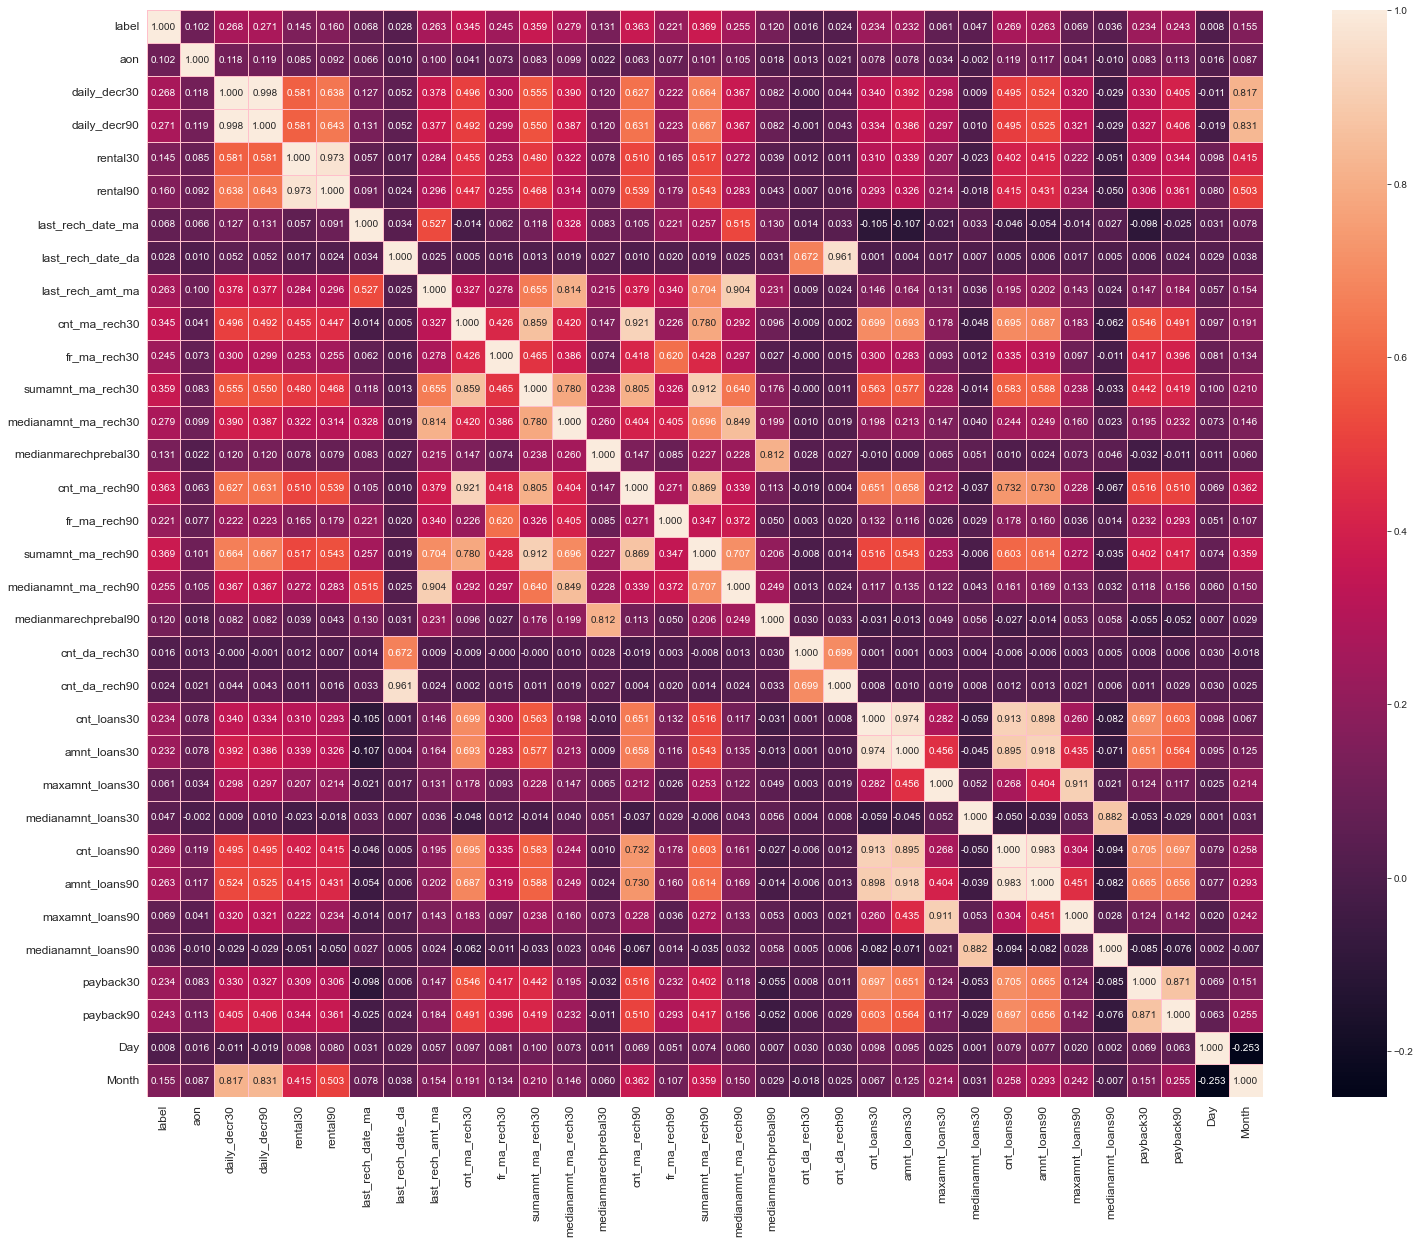

In [60]:
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linecolor='pink', annot=True, fmt='0.3f', linewidth='0.5')
plt.xticks(fontsize=12)            
plt.yticks(fontsize=12)
plt.show()

The above heatmap shows that there is a multicollinearity present in the dataset. Lets deal with this problem.

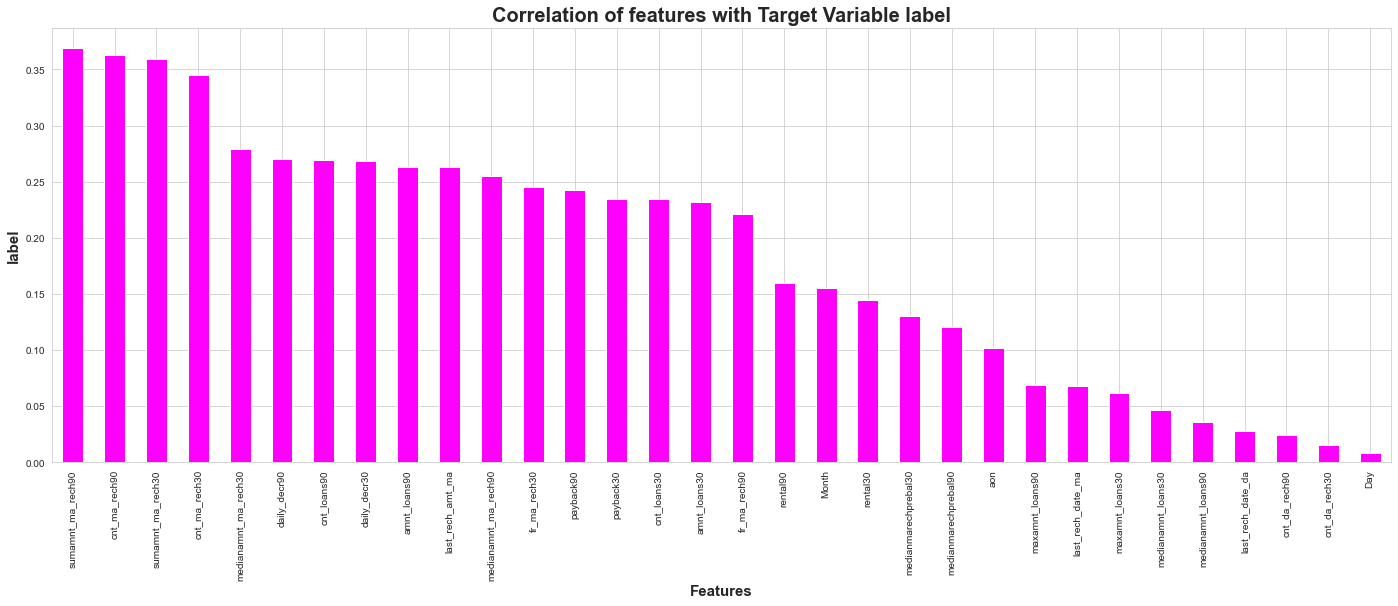

In [61]:
plt.figure(figsize = (24,8))
df_new.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

# Splitting Data into target and features

In [62]:
Y = df_new['label']
X = df_new.drop(['label'], axis =1)

# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc= StandardScaler()
X_scale = sc.fit_transform(X)

# Handling Imbalanced data

In [65]:
df_new['label'].value_counts()

1    173461
0     24713
Name: label, dtype: int64

From this value count output it is clear that our target variable is highly imbalanced. Here we will balance it using SMOTE oversampling technique

In [66]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_scale, Y = oversample.fit_resample(X_scale, Y)

In [67]:
Y.value_counts()

0    173461
1    173461
Name: label, dtype: int64

Here we have successfully balanced our target variable

# Multicollinearity

Here we will use the VIF method to check for multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.056205,aon
1,781.446409,daily_decr30
2,855.426562,daily_decr90
3,47.221414,rental30
4,51.824889,rental90
5,2.893697,last_rech_date_ma
6,18.750899,last_rech_date_da
7,13.266386,last_rech_amt_ma
8,86.787867,cnt_ma_rech30
9,2.750955,fr_ma_rech30


For most of the Independent features VIF exceed permissible limit of 10.

1. daily_decr30 and daily_decr90 are highly correlated with each other.
2. cnt_loans90 and amnt_loans90 are highly correlated with each other.
3. cnt_loans30 and amnt_loans30 are highly correlated with each other.
4. cnt_ma_rech30 and sumamnt_ma_rech30 are highly correlated with each other.

Removing Some of highly correlated features will not work here as most of input features are correlated with each other either moderated or poorly.
So another way to address Multicollinerity is to Scale the Data and then apply PCA.

# PCA

In [70]:
from sklearn.decomposition import PCA

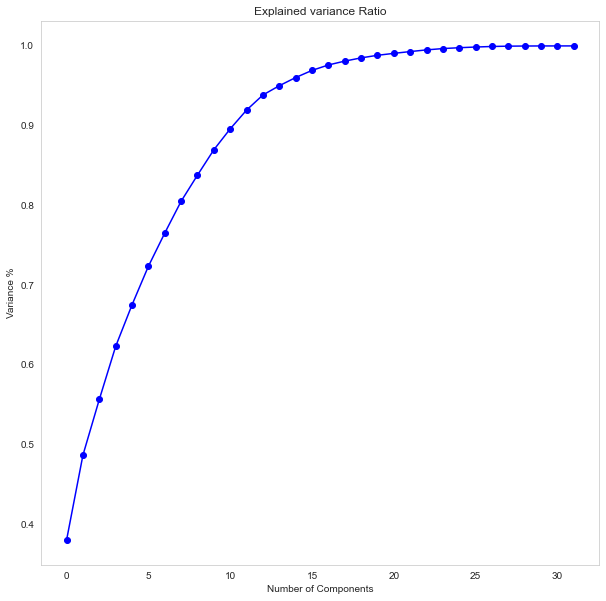

In [71]:
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()
plt.show()

from the above graph we can observe that 11 principal components attribute for 90% of variation in the data. We shall pick the first 11 components for our prediction

In [72]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [73]:
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

# Model Building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

# Split data into training & testing set

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (242845, 11)
Training target vector size: (242845,)
Test feature matrix size: (104077, 11)
Test target vector size: (104077,)


# Find Best random state

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(0,299):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7659040902408794 on Random_state 285


# Logistic Regression

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=285, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Logistics Regression')
print('\n')
print('Accuracy Score of Logistics Regression : ', accuracy_score(Y_test, y_pred_lr))
print('\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(Y_test, y_pred_lr))
print('\n')
print('classification Report of Logistics Regression','\n',classification_report(Y_test, y_pred_lr))
print('cross validation score of Logistics Regression',cross_val_score(LogisticRegression(),principle_x, Y,cv=10).mean())

Logistics Regression


Accuracy Score of Logistics Regression :  0.7659040902408794


Confusion matrix of Logistics Regression : 
 [[39645 12329]
 [12035 40068]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     51974
           1       0.76      0.77      0.77     52103

    accuracy                           0.77    104077
   macro avg       0.77      0.77      0.77    104077
weighted avg       0.77      0.77      0.77    104077

cross validation score of Logistics Regression 0.7624422903731207


# RandomForestClassifier

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=285, test_size=.3)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Random Forest Classifier Evaluation')
print('\n')
print('Accuracy Score of Random Forest Classifier :','\n', accuracy_score(Y_test, y_pred_rf))
print('\n')
print('Confusion matrix of Random Forest Classifier :','\n',confusion_matrix(Y_test, y_pred_rf))
print('\n')
print('classification Report of Random Forest Classifier','\n',classification_report(Y_test, y_pred_rf))
print('cross validation score of Random Forest Classifier',cross_val_score(RandomForestClassifier(),principle_x, Y,cv=10).mean())

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 
 0.9195307320541523


Confusion matrix of Random Forest Classifier : 
 [[48552  3422]
 [ 4953 47150]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     51974
           1       0.93      0.90      0.92     52103

    accuracy                           0.92    104077
   macro avg       0.92      0.92      0.92    104077
weighted avg       0.92      0.92      0.92    104077

cross validation score of Random Forest Classifier 0.9299150905076564


# Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=285, test_size=.3)
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred_dt))
print('\n')
print('Confusion matrix of DecisionTreeClassifier :','\n',confusion_matrix(Y_test, y_pred_dt))
print('\n')
print('classification Report of DecisionTreeClassifier','\n',classification_report(Y_test, y_pred_dt))
print('cross validation score of Decision Tree Classifier',cross_val_score(DecisionTreeClassifier(),principle_x, Y,cv=10).mean())

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.8574709109601545


Confusion matrix of DecisionTreeClassifier : 
 [[45681  6293]
 [ 8541 43562]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     51974
           1       0.87      0.84      0.85     52103

    accuracy                           0.86    104077
   macro avg       0.86      0.86      0.86    104077
weighted avg       0.86      0.86      0.86    104077

cross validation score of Decision Tree Classifier 0.8685468181616253


# KNeighborsClassifier

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=285, test_size=.3)
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('KNeighborsClassifier Evaluation')
print('\n')
print('Accuracy Score of KNeighborsClassifier :', accuracy_score(Y_test, y_pred_knn))
print('\n')
print('Confusion matrix of KNeighborsClassifier :','\n',confusion_matrix(Y_test, y_pred_knn))
print('\n')
print('classification Report of KNeighborsClassifier','\n',classification_report(Y_test, y_pred_knn))
print('cross validation score of KNeighborsClassifier',cross_val_score(KNeighborsClassifier(),principle_x, Y,cv=10).mean())

KNeighborsClassifier Evaluation


Accuracy Score of KNeighborsClassifier : 0.8910133843212237


Confusion matrix of KNeighborsClassifier : 
 [[50889  1085]
 [10258 41845]]


classification Report of KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     51974
           1       0.97      0.80      0.88     52103

    accuracy                           0.89    104077
   macro avg       0.90      0.89      0.89    104077
weighted avg       0.90      0.89      0.89    104077

cross validation score of KNeighborsClassifier 0.9006087945614336


# ExtraTreesClassifier

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=285, test_size=.3)
xt = ExtraTreesClassifier()
xt.fit(X_train,Y_train)
y_pred_xt=xt.predict(X_test)
print('ExtraTreesClassifier Evaluation')
print('\n')
print('Accuracy Score of ExtraTreesClassifier :','\n', accuracy_score(Y_test, y_pred_xt))
print('\n')
print('Confusion matrix of ExtraTreesClassifier :','\n',confusion_matrix(Y_test, y_pred_xt))
print('\n')
print('classification Report of ExtraTreesClassifier','\n',classification_report(Y_test, y_pred_xt))
print('cross validation score of ExtraTreesClassifier',cross_val_score(ExtraTreesClassifier(),principle_x, Y,cv=10).mean())

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 
 0.9357494931637154


Confusion matrix of ExtraTreesClassifier : 
 [[49310  2664]
 [ 4023 48080]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     51974
           1       0.95      0.92      0.93     52103

    accuracy                           0.94    104077
   macro avg       0.94      0.94      0.94    104077
weighted avg       0.94      0.94      0.94    104077

cross validation score of ExtraTreesClassifier 0.9438259785128696


Since the RandomForestClassifier model gives best accuracy score with minimum difference between accuraacy score & cross validation score
Hence we will select this one as final model and will do Hyperparameter tuning for the same

# Hyperparameter Optimization

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
n_estimators = [2,12,22,32,42]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [2,5]
min_samples_split = [3,4]
min_samples_leaf = [1,6]
bootstrap = ['true','false']

In [84]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [85]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [86]:
best_clf = clf.fit(principle_x, Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [87]:
best_clf.best_estimator_

RandomForestClassifier(bootstrap='false', max_depth=5, max_features='auto',
                       min_samples_split=3, n_estimators=12)

In [88]:
Final_mod = RandomForestClassifier(bootstrap='true',n_estimators= 32, max_depth=5 ,
                                 min_samples_split= 3, max_features= 'auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7681236007955649


# Confusion Matrix for Final Model

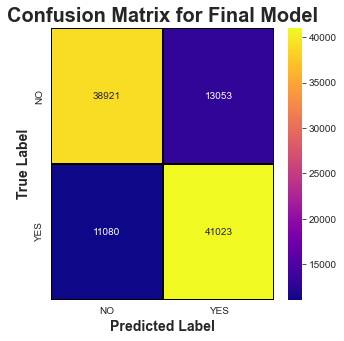

In [89]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# AUC & ROC Curve

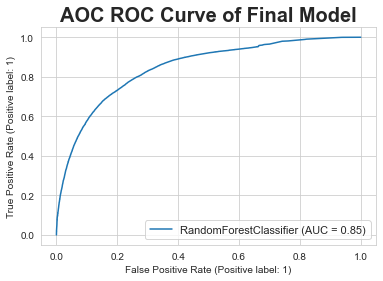

Auc Score :
 0.7680997478109799


In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [91]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

In [92]:
# Prediction
prediction = Final_mod.predict(X_test)

In [93]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1
5,0,0
6,1,0
7,1,1
8,1,0
9,1,0
